In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.cluster import KMeans



In [2]:
kr_df = pd.read_csv('./KR_Corp_Waste.csv', encoding='cp949')

In [3]:
kr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16330 entries, 0 to 16329
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기초시군구(관할관청)  16330 non-null  object 
 1   업체명          16330 non-null  object 
 2   연락처          15850 non-null  object 
 3   폐기물구분        9691 non-null   object 
 4   폐기물명         16330 non-null  object 
 5   연간배출량(톤)     16330 non-null  float64
dtypes: float64(1), object(5)
memory usage: 765.6+ KB


In [4]:
kr_df.describe()

,연간배출량(톤)
count,1.633000e+04
mean,1.778464e+03
std,6.416214e+04
min,0.000000e+00
25%,3.636000e+00
50%,2.995000e+01
75%,1.787325e+02
max,7.774960e+06


In [5]:
kr_df.head(200)

,기초시군구(관할관청),업체명,연락처,폐기물구분,폐기물명,연간배출량(톤)
0,강원특별자치도 강릉시,(주)기성환경,033-655-6969,사업장배출시설계폐기물,그 밖의 폐목재류,250.83
1,강원특별자치도 강릉시,(주)기성환경,033-655-6969,사업장배출시설계폐기물,폐합성수지류(폐염화비닐수지류는 제외한다),219.17
2,강원특별자치도 강릉시,(주)에코비트워터(강릉하수처리장),033-650-5200,사업장배출시설계폐기물,그 밖의 공정오니(무기성),0.00
3,강원특별자치도 강릉시,(주)에코비트워터(강릉하수처리장),033-650-5200,사업장배출시설계폐기물,그 밖의 유기성오니,0.00
4,강원특별자치도 강릉시,(주)에코비트워터(강릉하수처리장),033-650-5200,사업장배출시설계폐기물,그 밖의 폐기물,0.00
...,...,...,...,...,...,...
195,강원특별자치도 원주시,(주)진우산업,033-732-0375,사업장생활계폐기물,그 밖의 폐목재류,1587.34
196,강원특별자치도 원주시,(주)진우산업,033-732-0375,사업장생활계폐기물,폐합성수지류(폐염화비닐수지류는 제외한다),4863.58
197,강원특별자치도 원주시,(주)케이씨씨문막공장,033-749-4511,사업장배출시설계폐기물,그 밖의 공정오니(무기성),110.12
198,강원특별자치도 원주시,(주)케이씨씨문막공장,033-749-4511,사업장배출시설계폐기물,폐유리섬유,1230.37


In [6]:
unique_waste_types = kr_df["폐기물구분"].dropna().unique()
print(unique_waste_types)

['사업장배출시설계폐기물' '사업장생활계폐기물']


In [7]:
unique_waste = kr_df["폐기물명"].dropna().unique()
print(unique_waste)

['그 밖의 폐목재류' '폐합성수지류(폐염화비닐수지류는 제외한다)' '그 밖의 공정오니(무기성)' '그 밖의 유기성오니'
 '그 밖의 폐기물' '하수처리오니' '그 밖의 폐산' '연구ㆍ검사용 폐시약' '동물성유지류' '음식물류폐기물' '폐발포합성수지'
 '폐식용유(식용을 목적으로 식품 재료와 원료를 제조ㆍ조리ㆍ가공하거나 식용유를 유통ㆍ사용 또는 음식물류 폐기물을 처리하는 과정에서 발생하는 기름을 말한다)'
 '수산물가공잔재물' '폐수처리오니' '자동차 폐타이어' '자동차회수폐냉매물질' '폐황산이 포함된 2차폐축전지'
 '그 밖의 폐수처리오니'
 '그 밖의 폐광물유[아스팔트유ㆍ그리스(grease)ㆍ방청유 및 수용성절삭유, 20퍼센트 이상의 이물질이 함유된 폐유, 고체상태의 폐유 등을 말한다]'
 '그 밖의 폐유독물질' '폐연마유ㆍ비수용성폐절삭유ㆍ폐열처리유(금속가공과정에서 발생된 것을 말한다)' '그 밖의 동ㆍ식물성잔재물'
 '그 밖의 연소잔재물' '금속성폐촉매' '석탄재' '석면의 제거작업에 사용된 모든 비닐시트ㆍ방진마스크ㆍ작업복ㆍ집진필터 등'
 '폐기계유ㆍ폐작동유(공업용 기계유ㆍ냉동기유ㆍ터어빈유ㆍ베어링윤활유ㆍ압축기유ㆍ유압작동유ㆍ열매체유 및 프로세스유 등을 말한다)'
 '폐유성페인트' '폐절연유(폴리클로리네이티드비페닐 함유 폐기물을 제외한다)' '흩날릴 우려가 없는 폐석면'
 '폐전주(폐애자, 폐근가 및 폐합성수지제 커버류 등을 포함한다)' '그 밖의 광재류' '폐내화물' '폐합성고무류'
 '(구)폐가구류, 폐도장목, 폐목재포장재, 폐전선드럼(원목상태의 깨끗한 목재를 말한다)' '폐콘크리트' '폐연료유'
 '폐윤활유(「자원의 절약과 재활용촉진에 관한 법률 시행령」 제18조에 따른 재활용의무 대상 제품ㆍ포장재인 기어유 및 내연기관용 윤활유를 말한다)'
 '생활폐기물 소각시설 비산재' '폐어망' '폐이온교환수지' '폐토사' '그 밖의 폐유' '손상성폐기물' '일반의료폐기물'
 '조직물류폐기물(태반을 재활용하는 경우는 제외한다)' '병리계폐기물' '격리의료(신종코로나

In [7]:
cities_kr = kr_df["기초시군구(관할관청)"].dropna().unique()
print(cities_kr)

['강원특별자치도 강릉시' '강원특별자치도 고성군' '강원특별자치도 동해시' '강원특별자치도 삼척시' '강원특별자치도 속초시'
 '강원특별자치도 양구군' '강원특별자치도 양양군' '강원특별자치도 영월군' '강원특별자치도 원주시' '강원특별자치도 인제군'
 '강원특별자치도 정선군' '강원특별자치도 철원군' '강원특별자치도 춘천시' '강원특별자치도 태백시' '강원특별자치도 평창군'
 '강원특별자치도 홍천군' '강원특별자치도 화천군' '강원특별자치도 횡성군' '경기도 가평군' '경기도 고양시'
 '경기도 고양시 덕양구' '경기도 고양시 일산동구' '경기도 고양시 일산서구' '경기도 과천시' '경기도 광명시' '경기도 광주시'
 '경기도 구리시' '경기도 군포시' '경기도 김포시' '경기도 남양주시' '경기도 동두천시' '경기도 부천시'
 '경기도 부천시 대산동' '경기도 부천시 범안동' '경기도 부천시 부천동' '경기도 부천시 상동' '경기도 부천시 성곡동'
 '경기도 부천시 신중동' '경기도 부천시 오정동' '경기도 성남시' '경기도 성남시 분당구' '경기도 수원시'
 '경기도 수원시 영통구' '경기도 수원시 팔달구' '경기도 시흥시' '경기도 안산시' '경기도 안산시 단원구'
 '경기도 안산시 상록구' '경기도 안성시' '경기도 안양시' '경기도 안양시 만안구' '경기도 양주시' '경기도 양평군'
 '경기도 여주시' '경기도 연천군' '경기도 오산시' '경기도 용인시' '경기도 용인시 기흥구' '경기도 용인시 수지구'
 '경기도 용인시 처인구' '경기도 의왕시' '경기도 의정부시' '경기도 이천시' '경기도 파주시' '경기도 평택시'
 '경기도 포천시' '경기도 하남시' '경기도 화성시' '경상남도 거제시' '경상남도 거창군' '경상남도 고성군' '경상남도 김해시'
 '경상남도 남해군' '경상남도 마산시' '경상남도 밀양시' '경상남도 사천시' '경상남도 산청군' '경상남도 양산시'
 '경상남도 의령군' '경상남도 진주시' '경상남도 진해시' '경상남도 창녕군'

In [8]:
companies = kr_df["업체명"].dropna().unique()
for company in companies:
    print(company)

(주)기성환경
(주)에코비트워터(강릉하수처리장)
(주)이마트강릉점
(주)정필 강릉지점
(주)한진종합관리
강릉영동대학교행복기숙사유한회사
영동 수질정화시설
우리이엔티(주)
유한회사 강릉자동차 폐차장
주문진농공단지협의회
주식회사 미코세라믹스
한국남동발전(주) 영동에코발전본부
한국에너지(주)
한국전력공사 강릉지사
한라시멘트주식회사
해양환경공단 옥계사업소
고성군 농어촌폐기물종합처리시설
주식회사미봉
죽왕수산업협동조합
화진포콘도
(주)지에스동해전력
(주)화남인터내셔날
글로리아 산부인과
금강병원장례식장
누가이비인후과
누니부신피부과의원
대영물산
동해금강요양병원
동해금강의원
동해시건조인협회
동해요양원
동해이레요양병원
성심의원
심내과의원
쌍용로지스틱스(주)
아이리스 의원
원강한의원
원플러스원
참사랑노인복지원
탁내과의원
필 동물병원
한섬한의원
항포구정화사업
(주)삼표시멘트 삼척공장
강원도삼척의료원
강원도자동차전문정비사업조합 삼척지회
강원에너지환경회
삼척시효도노인요양원
삼척화력1,2호기 EPC건설공사
심포리 정수장 폐수처리오니 위탁처리공사
홈플러스(주)삼척점
환경시설관리주식회사(삼척)
강원도자동차전문정비사업조합 속초지회
세범푸드(주)
속초해양산업단지 폐수종말처리시설
신동식품(주)
양구군 상하수도사업소-남면하수처리장
양구군 상하수도사업소-양구하수처리장
양양군 생활폐기물 소각시설
관내학교 과학실 폐수,폐시약처리
담우물산(주)
대성엠디아이(주) 라임켐센터
쌍용씨앤이(주)영월공장
주식회사 신세계산업
(자)금강개발
(자)대선환경
(자)우진창호
(주)뉴보텍 문막공장
(주)도루코리빙 문막지점
(주)웅진미트
(주)진우산업
(주)케이씨씨문막공장
(주)파리크라상 원주지점
(주)푸드플래닛
(주)하나플랜트
강원도자동차전문정비사업조합 원주지회
경창무역(주)
남원주폐차장
다솜우드
대한통운(주)강원지사  원주시흥업면원문로
동북쇼핑  원주점
마루이엔티주식회사
문막(강릉)휴게소
문막(서창)휴게소
성지의료재단 성지병원
에이치디씨리조트 주식회사
에이케이에스앤디(주)AK원주점
에코바이오홀딩스(주) 원주사업소
연세대 원

In [9]:
company_max_values = kr_df.groupby("업체명")["연간배출량(톤)"].max().reset_index()
print(company_max_values)

                     업체명  연간배출량(톤)
0            (광산국제)정상어학원    29.720
1          (복)천성원신탄진한일병원    33.670
2             (사)대소산단협의회  3110.760
3     (사)맹동산업단지 입주기업체협의회  2231.400
4           (사)목포자유시장상인회   248.190
...                  ...       ...
4758        희성피엠텍(주)당진공장  7031.380
4759             희창물산(주)    28.600
4760            흰돌경로복지의원     0.074
4761              흰돌요양센터     0.093
4762             힐탑탑플레이스    83.410

[4763 rows x 2 columns]


In [10]:
company_max_values = (
    kr_df.groupby("업체명")["연간배출량(톤)"]
    .max()
    .reset_index()
    .sort_values(by="연간배출량(톤)", ascending=True)  # Sort from min to max
)

for index, row in company_max_values.iterrows():
    print(f"Company: {row['업체명']}, Max Emission: {row['연간배출량(톤)']:.2f} tons")



Company: (주)포스코오엔엠, Max Emission: 0.00 tons
Company: 녹산밧데리-200225, Max Emission: 0.00 tons
Company: 알에스코리아(주), Max Emission: 0.00 tons
Company: (주)하나플랜트, Max Emission: 0.00 tons
Company: 현대글로비스(주)울산센터 제1공장, Max Emission: 0.00 tons
Company: 동양에너텍(주), Max Emission: 0.00 tons
Company: 한국산업폐기물(주), Max Emission: 0.00 tons
Company: 주식회사 비제이테크, Max Emission: 0.00 tons
Company: 포항죽도시장상가번영회, Max Emission: 0.00 tons
Company: 진흥테크주식회사, Max Emission: 0.00 tons
Company: 우신정공(주), Max Emission: 0.00 tons
Company: 환상자원, Max Emission: 0.00 tons
Company: 포천~화도 고속도로 민간투자사업 2공구, Max Emission: 0.00 tons
Company: (주)가야천안지점, Max Emission: 0.00 tons
Company: 대산에코(주), Max Emission: 0.00 tons
Company: 메디오의원, Max Emission: 0.00 tons
Company: 쿨쿨정신건강의학과의원, Max Emission: 0.00 tons
Company: 빙빙한의원, Max Emission: 0.00 tons
Company: 토산보건진료소, Max Emission: 0.01 tons
Company: 둥둥마취통증의학과의원, Max Emission: 0.01 tons
Company: 칠량보건지소, Max Emission: 0.01 tons
Company: 닥터권치과의원, Max Emission: 0.01 tons
Company: 월령보건진료소, Max Emiss

c:\Users\Allegsu Magana\Documents\allegsuf\programming\py_project\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Allegsu Magana\Documents\allegsuf\programming\py_project\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Allegsu Magana\Documents\allegsuf\programming\py_project\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Allegsu Magana\Documents\allegsuf\programming\py_project\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Allegsu Magana\Documents\allegsuf\programming\py_project\venv\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47049 (\N{

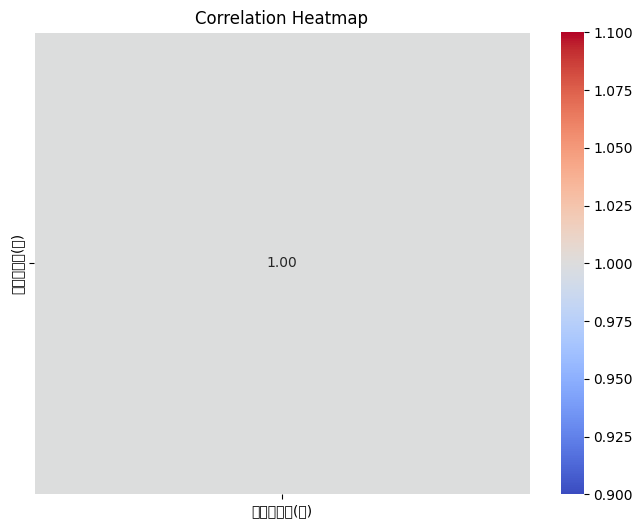

In [20]:
corr_matrix = kr_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



In [29]:

# Encode categorical features
encoder = LabelEncoder()
kr_df["폐기물구분_Encoded"] = encoder.fit_transform(kr_df["폐기물구분"].astype(str))
kr_df["업체명_Encoded"] = encoder.fit_transform(kr_df["업체명"].astype(str))


In [30]:
# Select features (X) and target (y)
features = ["폐기물구분_Encoded", "업체명_Encoded"]  # Add more relevant features
X = kr_df[features]
y = kr_df["연간배출량(톤)"]

In [31]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Standardize features (X)
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

In [33]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation="relu"),
    layers.Dense(1)  # Output layer for regression
])

c:\Users\Allegsu Magana\Documents\allegsuf\programming\py_project\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [35]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=16, verbose=1)

Epoch 1/100
817/817 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 6697299456.0000 - mae: 2174.7517 - val_loss: 958038080.0000 - val_mae: 1639.2257
Epoch 2/100
817/817 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 21106567168.0000 - mae: 4028.8616 - val_loss: 958013568.0000 - val_mae: 1637.0583
Epoch 3/100
817/817 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 6549517312.0000 - mae: 1980.3864 - val_loss: 957977152.0000 - val_mae: 1636.1008
Epoch 4/100
817/817 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 11496057856.0000 - mae: 2524.0071 - val_loss: 957937344.0000 - val_mae: 1636.7393
Epoch 5/100
817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1500264192.0000 - mae: 1443.1357 - val_loss: 957875008.0000 - val_mae: 1640.4686
Epoch 6/100
817/817 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 862058112.0000 - mae: 1146.5677 - val_loss: 957817024.0000 - val_mae: 1646.2294
Epoch 7/100
817/817 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 703799936.0000 - mae: 1455.2260 - val_loss: 957756416.0000 - val_mae: 1654.2378
Epoc

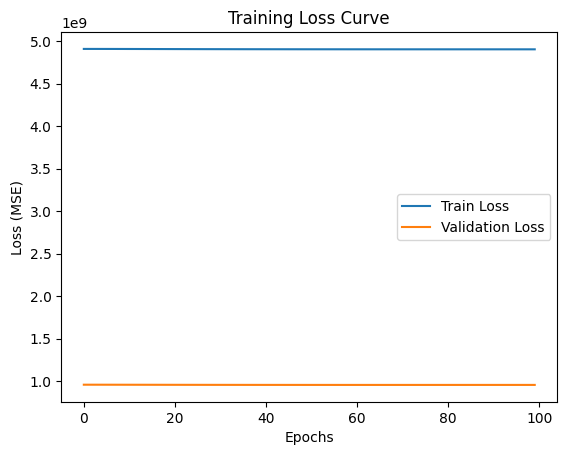

In [37]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


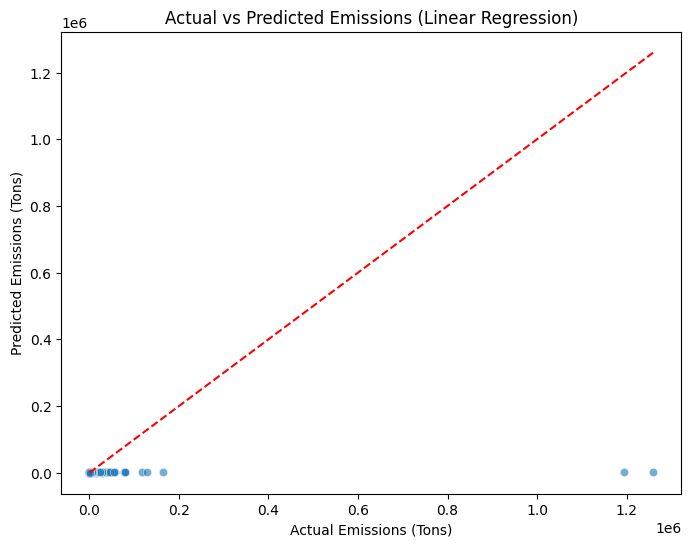

In [40]:
y_pred = model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred.flatten(), alpha=0.6)
plt.xlabel("Actual Emissions (Tons)")
plt.ylabel("Predicted Emissions (Tons)")
plt.title("Actual vs Predicted Emissions (Linear Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")  # Ideal line
plt.show()


In [39]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f} tons")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error: 2886.39 tons
R² Score: -0.00
